In [ ]:
import torch
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 将数据集分类为睁眼和闭眼两个类别
base_path = '/content/drive/MyDrive/mrlEyes_2018_01/s0001'
imgs_paths, imgs_labels = [], []
imgs = os.listdir(base_path) # 获取文件名

# 可以通过图像的名称来判别其类型
for img in imgs:
  label = int(str(img)[16])
  imgs_paths.append(base_path + '/' + img)
  imgs_labels.append(label)

In [ ]:
# 将两个类别的文件放到相应的文件夹中
# 创建对应两个类别的文件夹
def mkdir(path):
    '''
    创建指定的文件夹
    :param path: 文件夹路径，字符串格式
    :return: True(新建成功) or False(文件夹已存在，新建失败)
    '''
    # 引入模块
    import os

    # 去除首位空格
    path = path.strip()
    # 去除尾部 \ 符号
    path = path.rstrip("\\")

    # 判断路径是否存在
    # 存在     True
    # 不存在   False
    isExists = os.path.exists(path)

    # 判断结果
    if not isExists:
        # 如果不存在则创建目录
         # 创建目录操作函数
        os.makedirs(path)
        print(path + '创建成功')
        return True
    else:
        # 如果目录存在则不创建，并提示目录已存在
        print(path + '目录已存在')
        return False

dir_open = '/content/drive/MyDrive/mrlEyes_2018_01/open/'
dir_close = '/content/drive/MyDrive/mrlEyes_2018_01/close/'
mkdir(dir_open)
mkdir(dir_close)

# 筛选出两个类别的文件并放入对应文件夹
open_imgs = []
close_imgs = []


for i, path in enumerate(imgs_paths):
  if imgs_labels[i] == 1:
    open_imgs.append(path)
  else:
    close_imgs.append(path)


import shutil, os
for open in open_imgs:
  shutil.copy(open, '/content/drive/MyDrive/mrlEyes_2018_01/open/')
for close in close_imgs:
  shutil.copy(close, '/content/drive/MyDrive/mrlEyes_2018_01/close/')

/content/drive/MyDrive/mrlEyes_2018_01/open/创建成功
/content/drive/MyDrive/mrlEyes_2018_01/close/创建成功


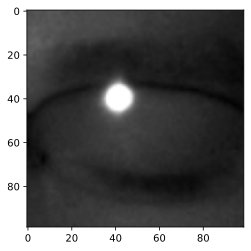

In [ ]:
Datadirectory = "/content/drive/MyDrive/mrlEyes_2018_01"
Classes = ["close", "open"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        # cv2.imread()函数的参数为：
        # filepath：读入image的完整路径
        # flags标志位：cv2.IMREAD_COLOER，默认参数，读入彩色图片；cv2.IMREAD_GRAYSCALE：读入灰度图片；cv2.IMREAD_UNCHANGED：读入完整图片
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        # cv2.cvtColor()颜色转换函数
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        # 接收一张图片而不显示出来，cmap将标量数据映射到色彩图
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

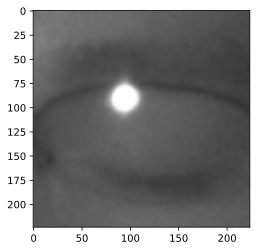

In [ ]:
# 调整图像大小为224*224
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
# 创建训练数据
training_Data = []
def create_training_Data():
   for category in Classes:
       path = os.path.join(Datadirectory, category)
       class_num = Classes.index(category) # 0 1，0表示闭眼，1表示闭眼
       for img in os.listdir(path):
           try:
               img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
               backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
               new_array = cv2.resize(backtorgb, (img_size, img_size))
               training_Data.append([new_array,class_num]).float() # training_Data
           except Exception as e:
               pass
create_training_Data()


In [ ]:
# 随机shuffle，避免过拟合
import random
random.shuffle(training_Data)

In [ ]:
import torchvision
# 我们使用在ImageNet数据集上预训练的ResNet-18作为源模型，指定pretrained=True以自动下载预训练的模型参数。
pretrained_net = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
pretrained_net.fc # 输出层fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
from torch import nn

finetune_net = torchvision.models.resnet18(pretrained=True) # 使用resnet的模型以及ImageNet的训练参数
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2) # 设置输出层的模型参数
nn.init.xavier_uniform_(finetune_net.fc.weight) # 随机初始化最后一层输出层的参数

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[-0.0519,  0.0047, -0.0379,  ...,  0.0186, -0.0265,  0.1067],
        [-0.0956, -0.0940, -0.1023,  ...,  0.0443, -0.0975,  0.1028]],
       requires_grad=True)

In [ ]:
!pip install d2l
from d2l import torch as d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0


In [ ]:
!pip install matplotlib==3.0.0
# 如果param_group=True，输出层中的模型参数将使用十倍的学习率
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(training_Data,
        batch_size=batch_size, shuffle=False)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    train(net, train_iter, loss, trainer, num_epochs,
                   devices)
    
def train(net, train_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
    """用多GPU进行模型训练"""
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        # 4个维度：储存训练损失，训练准确度，实例数，特点数
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch(
                net, np.transpose(features, [0, 3, 1, 2]).float(), labels, loss, trainer, devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[3],
                              None))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc ')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')
    
def train_batch(net, X, y, loss, trainer, devices):
    """用多GPU进行小批量训练"""
    if isinstance(X, list):
        # 微调BERT中所需（稍后讨论）
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = d2l.accuracy(pred, y)
    return train_loss_sum, train_acc_sum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


loss 1.685, train acc 
4.3 examples/sec on [device(type='cpu')]


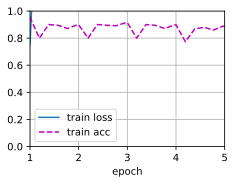

In [ ]:
train_fine_tuning(finetune_net, 5e-5)